# Exploratory Data Analysis - Fraud Transaction Detection

**Dataset:** Fraud_Data.csv

**Objective:** Comprehensive exploratory analysis to understand:
- Dataset structure and user behavior patterns
- Class distribution and fraud patterns
- Temporal analysis of signup and purchase times
- Geographic distribution and IP analysis
- User demographics and device patterns
- Feature engineering opportunities

## 1. Setup and Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Configure display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Load datasets
fraud_df = pd.read_csv('/content/sample_data/Fraud_Data.csv')
ip_country = pd.read_csv('/content/sample_data/IpAddress_to_Country.csv')

print(f"Fraud Data: {fraud_df.shape[0]:,} rows × {fraud_df.shape[1]} columns")
print(f"IP Country: {ip_country.shape[0]:,} rows × {ip_country.shape[1]} columns")
print("\nFraud Data Sample:")
fraud_df.head()

Fraud Data: 151,112 rows × 11 columns
IP Country: 138,846 rows × 3 columns

Fraud Data Sample:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.800,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.866,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.111,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.914,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.453,0


## 2. Dataset Overview

In [3]:
# Basic information
print("="*80)
print("FRAUD DATA INFORMATION")
print("="*80)
fraud_df.info()

print("\n" + "="*80)
print("IP COUNTRY DATA INFORMATION")
print("="*80)
ip_country.info()

FRAUD DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB

IP COUNTRY DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------ 

In [4]:
# Statistical summary
print("\n" + "="*80)
print("STATISTICAL SUMMARY - FRAUD DATA")
print("="*80)
fraud_df.describe(include='all')


STATISTICAL SUMMARY - FRAUD DATA


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000,151112,151112,151112.000,151112,151112,151112,151112,151112.000,151112.000,151112.000
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,2015-06-10 07:02:20,2015-07-17 23:22:55,NaN,NGQCKIADMZORL,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.041,NaN,NaN,36.935,NaN,NaN,NaN,NaN,33.141,2152145330.959,0.094
std,115369.285,NaN,NaN,18.323,NaN,NaN,NaN,NaN,8.618,1248497030.100,0.291
min,2.000,NaN,NaN,9.000,NaN,NaN,NaN,NaN,18.000,52093.497,0.000
25%,100642.500,NaN,NaN,22.000,NaN,NaN,NaN,NaN,27.000,1085933882.532,0.000
50%,199958.000,NaN,NaN,35.000,NaN,NaN,NaN,NaN,33.000,2154770162.407,0.000
75%,300054.000,NaN,NaN,49.000,NaN,NaN,NaN,NaN,39.000,3243257679.723,0.000


In [5]:
# Missing values check
missing_fraud = fraud_df.isnull().sum()
missing_fraud_pct = 100 * missing_fraud / len(fraud_df)
missing_table = pd.DataFrame({
    'Missing Count': missing_fraud,
    'Percentage': missing_fraud_pct
})

print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
print(missing_table[missing_table['Missing Count'] > 0])
if missing_fraud.sum() == 0:
    print("✅ No missing values detected in Fraud Data")

# Check IP Country missing values
missing_ip = ip_country.isnull().sum()
if missing_ip.sum() == 0:
    print("✅ No missing values detected in IP Country Data")


MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
✅ No missing values detected in Fraud Data
✅ No missing values detected in IP Country Data


In [6]:
# Check for duplicates
duplicates = fraud_df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates:,}")
if duplicates > 0:
    print(f"⚠️  Found {duplicates} duplicate rows")
else:
    print("✅ No duplicates detected")

# Check unique users
unique_users = fraud_df['user_id'].nunique()
print(f"\nUnique users: {unique_users:,}")
print(f"Total transactions: {len(fraud_df):,}")
print(f"Average transactions per user: {len(fraud_df)/unique_users:.2f}")


Duplicate rows: 0
✅ No duplicates detected

Unique users: 151,112
Total transactions: 151,112
Average transactions per user: 1.00


## 3. Class Distribution Analysis

In [7]:
# Class distribution
class_counts = fraud_df['class'].value_counts()
class_pct = 100 * class_counts / len(fraud_df)
imbalance_ratio = class_counts[0] / class_counts[1] if 1 in class_counts.index else 0

print("="*80)
print("CLASS DISTRIBUTION")
print("="*80)
print(f"\nLegitimate (Class 0): {class_counts[0]:,} ({class_pct[0]:.2f}%)")
if 1 in class_counts.index:
    print(f"Fraudulent (Class 1): {class_counts[1]:,} ({class_pct[1]:.2f}%)")
    print(f"\n⚠️  Imbalance Ratio: {imbalance_ratio:.2f}:1")
else:
    print("Fraudulent (Class 1): 0 (0.00%)")
    print("\n⚠️  No fraudulent transactions in dataset")

CLASS DISTRIBUTION

Legitimate (Class 0): 136,961 (90.64%)
Fraudulent (Class 1): 14,151 (9.36%)

⚠️  Imbalance Ratio: 9.68:1


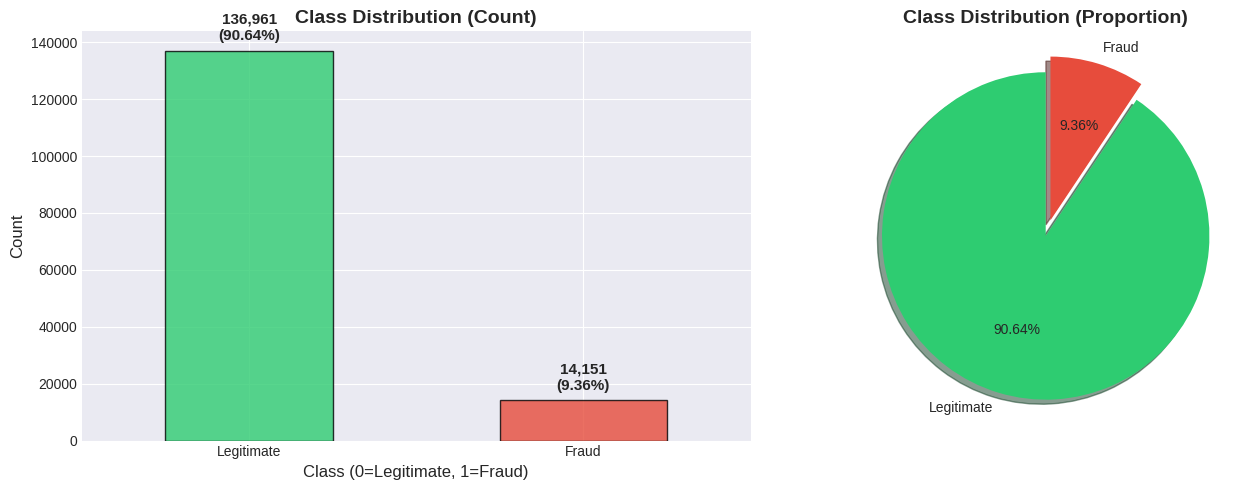

In [8]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
class_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Legitimate, 1=Fraud)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Legitimate', 'Fraud'], rotation=0)
for i, (idx, v) in enumerate(class_counts.items()):
    axes[0].text(i, v + max(class_counts)*0.02, f'{v:,}\n({class_pct[idx]:.2f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0, 0.1) if len(class_counts) > 1 else (0,)
axes[1].pie(class_counts, labels=['Legitimate', 'Fraud'] if len(class_counts) > 1 else ['Legitimate'],
           autopct='%1.2f%%', startangle=90, colors=colors[:len(class_counts)],
           explode=explode, shadow=True)
axes[1].set_title('Class Distribution (Proportion)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Temporal Analysis

In [9]:
# Convert datetime columns
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Create time-based features
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600  # hours
fraud_df['purchase_hour'] = fraud_df['purchase_time'].dt.hour
fraud_df['purchase_day'] = fraud_df['purchase_time'].dt.day_name()
fraud_df['purchase_month'] = fraud_df['purchase_time'].dt.month
fraud_df['signup_hour'] = fraud_df['signup_time'].dt.hour

print("="*80)
print("TEMPORAL STATISTICS")
print("="*80)
print(f"\nSignup time range: {fraud_df['signup_time'].min()} to {fraud_df['signup_time'].max()}")
print(f"Purchase time range: {fraud_df['purchase_time'].min()} to {fraud_df['purchase_time'].max()}")
print(f"\nTime since signup (hours):")
print(fraud_df['time_since_signup'].describe())

TEMPORAL STATISTICS

Signup time range: 2015-01-01 00:00:42 to 2015-08-18 04:40:29
Purchase time range: 2015-01-01 00:00:44 to 2015-12-16 02:56:05

Time since signup (hours):
count   151112.000
mean      1370.008
std        868.406
min          0.000
25%        607.432
50%       1368.429
75%       2123.479
max       2879.992
Name: time_since_signup, dtype: float64


In [10]:
# Time since signup analysis by class
print("\n" + "="*80)
print("TIME SINCE SIGNUP BY CLASS")
print("="*80)
print("\nLegitimate Transactions:")
print(fraud_df[fraud_df['class']==0]['time_since_signup'].describe())
if 1 in fraud_df['class'].values:
    print("\nFraudulent Transactions:")
    print(fraud_df[fraud_df['class']==1]['time_since_signup'].describe())

    # Statistical test
    legit_time = fraud_df[fraud_df['class']==0]['time_since_signup']
    fraud_time = fraud_df[fraud_df['class']==1]['time_since_signup']
    t_stat, p_value = stats.mannwhitneyu(legit_time, fraud_time, alternative='two-sided')
    print(f"\nMann-Whitney U Test:")
    print(f"  P-value: {p_value:.2e}")
    if p_value < 0.05:
        print("  ✅ Significant difference in time since signup (p < 0.05)")
    else:
        print("  ❌ No significant difference (p >= 0.05)")


TIME SINCE SIGNUP BY CLASS

Legitimate Transactions:
count   136961.000
mean      1441.994
std        830.164
min          0.038
25%        719.119
50%       1443.031
75%       2161.477
max       2879.992
Name: time_since_signup, dtype: float64

Fraudulent Transactions:
count   14151.000
mean      673.290
std       920.497
min         0.000
25%         0.000
50%         0.000
75%      1330.697
max      2878.874
Name: time_since_signup, dtype: float64

Mann-Whitney U Test:
  P-value: 0.00e+00
  ✅ Significant difference in time since signup (p < 0.05)


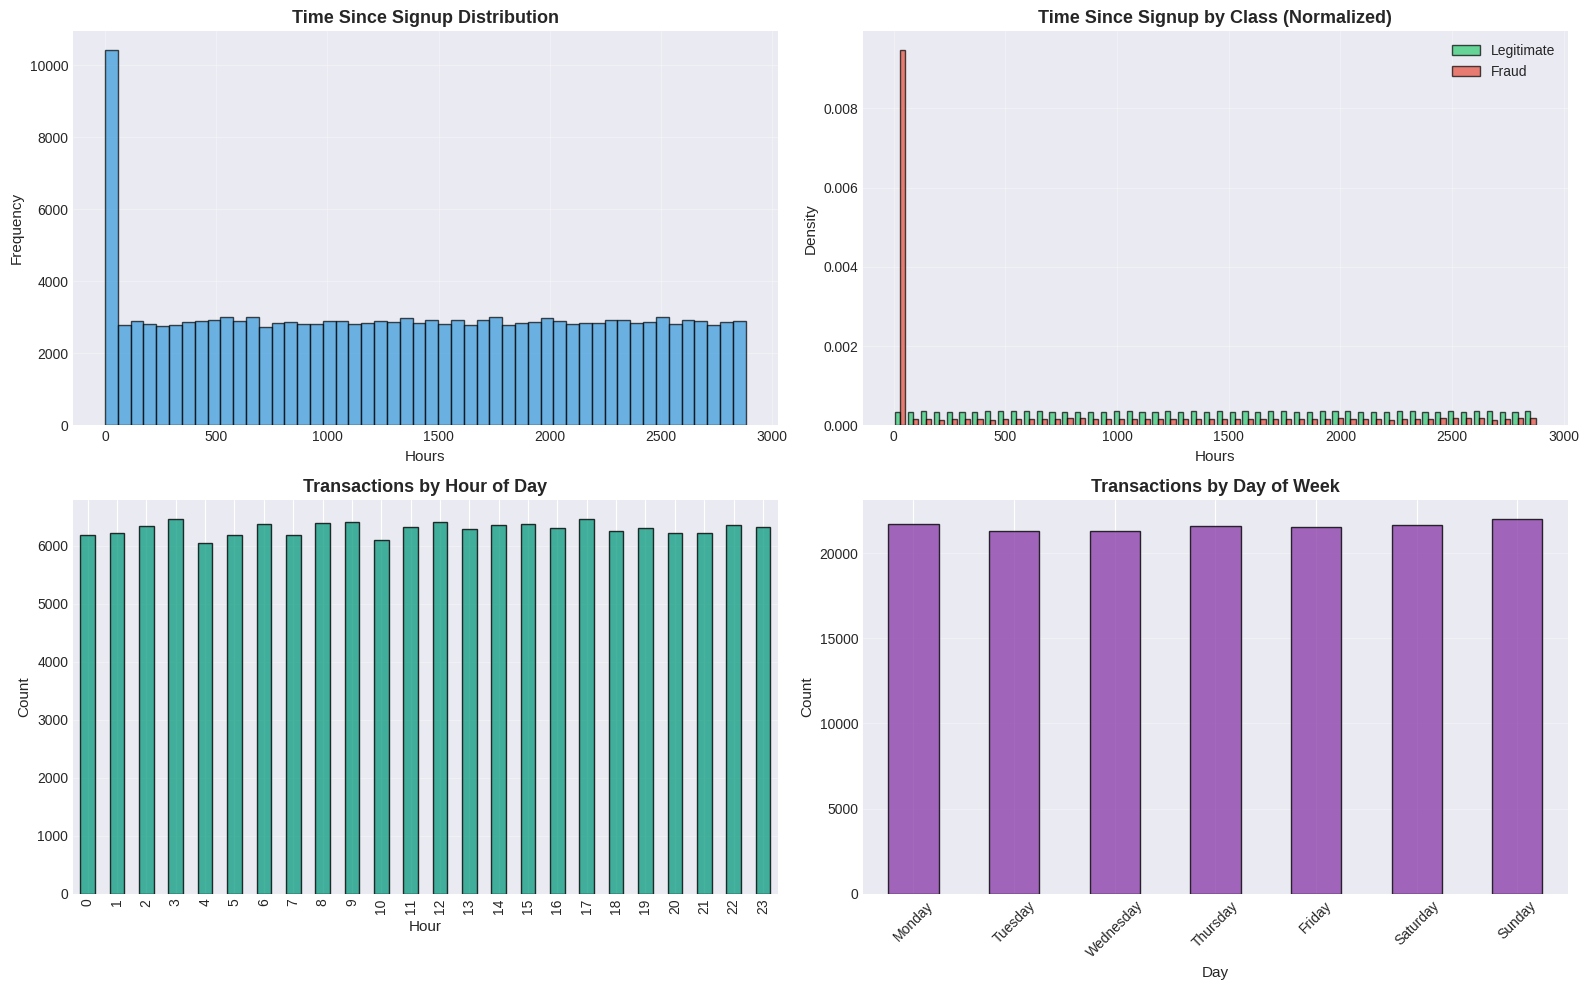

In [11]:
# Visualize time since signup distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histogram - all transactions
axes[0, 0].hist(fraud_df['time_since_signup'], bins=50, color='#3498db',
                alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Time Since Signup Distribution', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Hours', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# By class comparison
if 1 in fraud_df['class'].values:
    axes[0, 1].hist([legit_time, fraud_time], bins=50,
                    color=['#2ecc71', '#e74c3c'], label=['Legitimate', 'Fraud'],
                    alpha=0.7, edgecolor='black', density=True)
    axes[0, 1].set_title('Time Since Signup by Class (Normalized)', fontsize=13, fontweight='bold')
    axes[0, 1].set_xlabel('Hours', fontsize=11)
    axes[0, 1].set_ylabel('Density', fontsize=11)
    axes[0, 1].legend(fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)

# Purchase hour distribution
fraud_df['purchase_hour'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0],
                                                            color='#16a085', alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Transactions by Hour of Day', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Hour', fontsize=11)
axes[1, 0].set_ylabel('Count', fontsize=11)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Purchase day distribution
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = fraud_df['purchase_day'].value_counts().reindex(day_order)
day_counts.plot(kind='bar', ax=axes[1, 1], color='#8e44ad', alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Transactions by Day of Week', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Day', fontsize=11)
axes[1, 1].set_ylabel('Count', fontsize=11)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

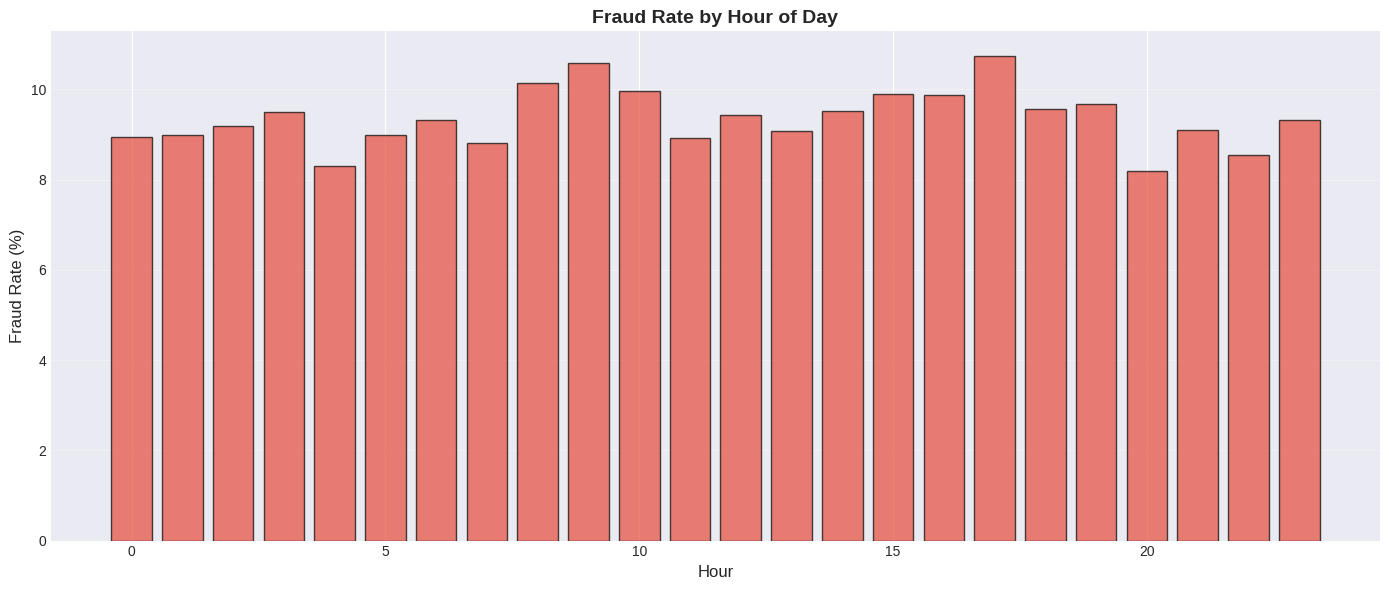

In [12]:
# Fraud rate by hour
if 1 in fraud_df['class'].values:
    hourly_fraud = fraud_df.groupby('purchase_hour')['class'].agg(['sum', 'count', 'mean'])
    hourly_fraud.columns = ['Fraud_Count', 'Total', 'Fraud_Rate']

    fig, ax = plt.subplots(figsize=(14, 6))

    ax.bar(hourly_fraud.index, hourly_fraud['Fraud_Rate'] * 100,
           color='#e74c3c', alpha=0.7, edgecolor='black')
    ax.set_title('Fraud Rate by Hour of Day', fontsize=14, fontweight='bold')
    ax.set_xlabel('Hour', fontsize=12)
    ax.set_ylabel('Fraud Rate (%)', fontsize=12)
    ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

## 5. Purchase Value Analysis

In [13]:
# Purchase value statistics
print("="*80)
print("PURCHASE VALUE STATISTICS")
print("="*80)
print("\nOverall:")
print(fraud_df['purchase_value'].describe())

print("\nLegitimate Transactions:")
legit_values = fraud_df[fraud_df['class']==0]['purchase_value']
print(legit_values.describe())

if 1 in fraud_df['class'].values:
    print("\nFraudulent Transactions:")
    fraud_values = fraud_df[fraud_df['class']==1]['purchase_value']
    print(fraud_values.describe())

    # Statistical test
    t_stat, p_value = stats.mannwhitneyu(legit_values, fraud_values, alternative='two-sided')
    print(f"\nMann-Whitney U Test:")
    print(f"  P-value: {p_value:.2e}")
    if p_value < 0.05:
        print("  ✅ Significant difference in purchase values (p < 0.05)")
    else:
        print("  ❌ No significant difference (p >= 0.05)")

PURCHASE VALUE STATISTICS

Overall:
count   151112.000
mean        36.935
std         18.323
min          9.000
25%         22.000
50%         35.000
75%         49.000
max        154.000
Name: purchase_value, dtype: float64

Legitimate Transactions:
count   136961.000
mean        36.929
std         18.315
min          9.000
25%         22.000
50%         35.000
75%         49.000
max        154.000
Name: purchase_value, dtype: float64

Fraudulent Transactions:
count   14151.000
mean       36.993
std        18.398
min         9.000
25%        22.000
50%        35.000
75%        49.000
max       111.000
Name: purchase_value, dtype: float64

Mann-Whitney U Test:
  P-value: 7.18e-01
  ❌ No significant difference (p >= 0.05)


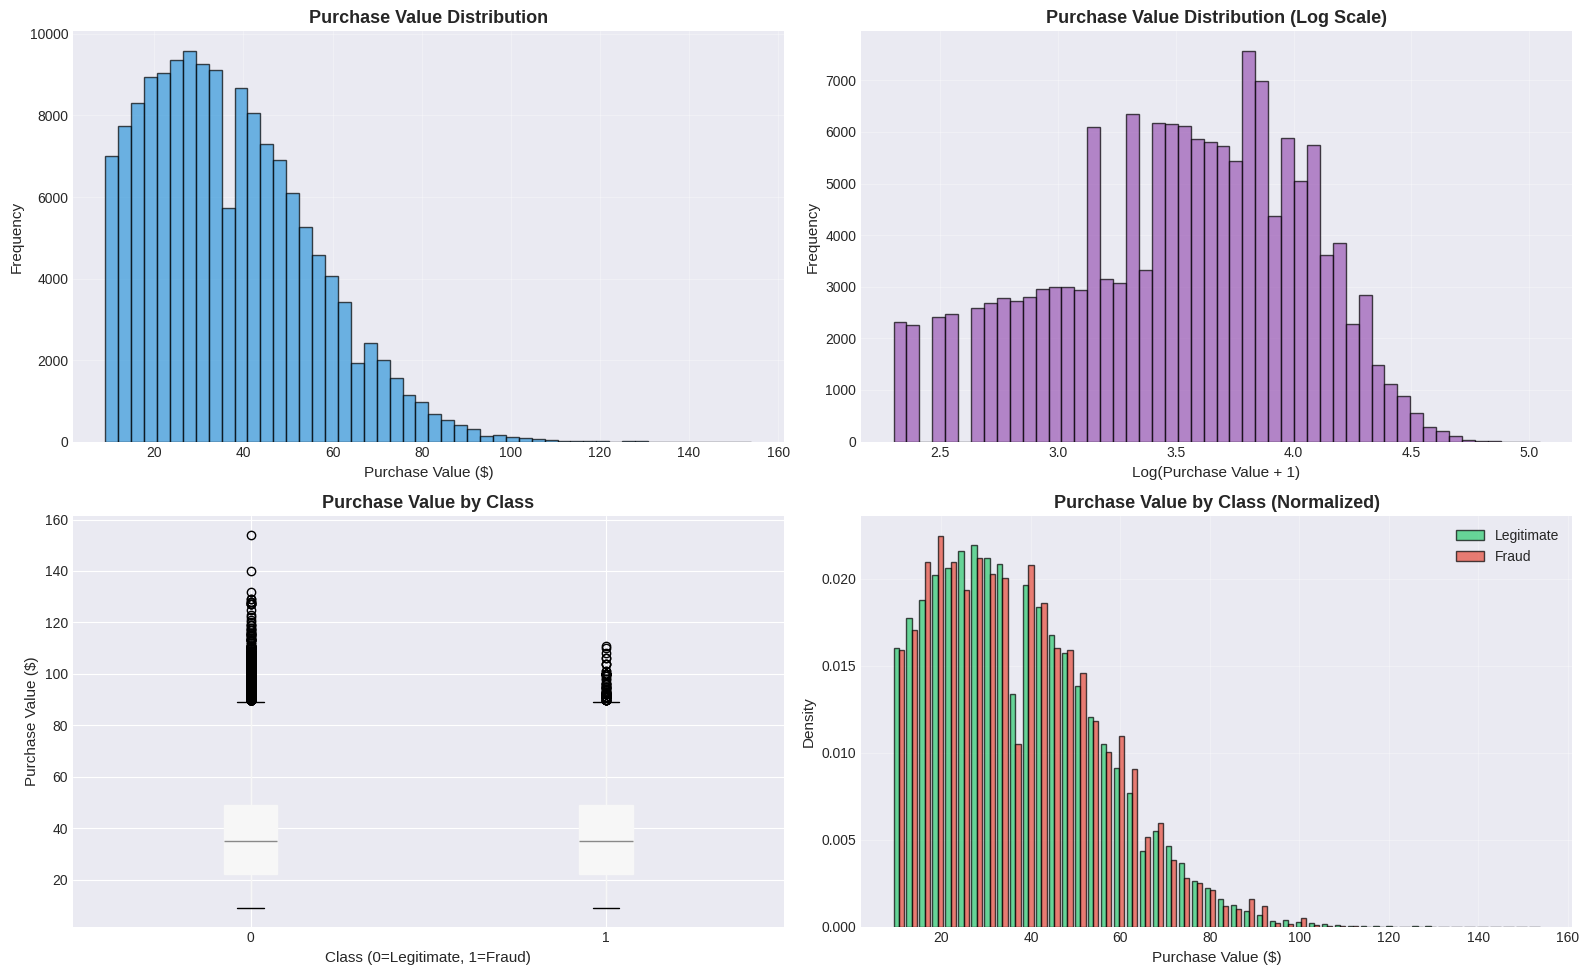

In [14]:
# Visualize purchase value distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histogram - all
axes[0, 0].hist(fraud_df['purchase_value'], bins=50, color='#3498db',
                alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Purchase Value Distribution', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Purchase Value ($)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Log scale
axes[0, 1].hist(np.log1p(fraud_df['purchase_value']), bins=50, color='#9b59b6',
                alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Purchase Value Distribution (Log Scale)', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Log(Purchase Value + 1)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# Box plot by class
fraud_df.boxplot(column='purchase_value', by='class', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('Purchase Value by Class', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Class (0=Legitimate, 1=Fraud)', fontsize=11)
axes[1, 0].set_ylabel('Purchase Value ($)', fontsize=11)
plt.suptitle('')

# Comparison histogram
if 1 in fraud_df['class'].values:
    axes[1, 1].hist([legit_values, fraud_values], bins=50,
                    color=['#2ecc71', '#e74c3c'], label=['Legitimate', 'Fraud'],
                    alpha=0.7, edgecolor='black', density=True)
    axes[1, 1].set_title('Purchase Value by Class (Normalized)', fontsize=13, fontweight='bold')
    axes[1, 1].set_xlabel('Purchase Value ($)', fontsize=11)
    axes[1, 1].set_ylabel('Density', fontsize=11)
    axes[1, 1].legend(fontsize=10)
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Geographic Analysis (IP Address)

In [15]:
# IP address to country mapping function
def find_country(ip_address):
    """Find country for given IP address."""
    try:
        ip_int = int(ip_address)
        mask = (ip_country['lower_bound_ip_address'] <= ip_int) & (ip_country['upper_bound_ip_address'] >= ip_int)
        matches = ip_country.loc[mask]
        if not matches.empty:
            return matches['country'].iloc[0]
        return 'Unknown'
    except:
        return 'Unknown'

# Map IP addresses to countries (sample for efficiency)
print("Mapping IP addresses to countries...")
fraud_df['country'] = fraud_df['ip_address'].apply(find_country)
print("✅ Mapping complete")

Mapping IP addresses to countries...
✅ Mapping complete


In [16]:
# Country statistics
country_counts = fraud_df['country'].value_counts()
print("="*80)
print("GEOGRAPHIC DISTRIBUTION")
print("="*80)
print(f"\nUnique countries: {fraud_df['country'].nunique()}")
print(f"Unknown IPs: {(fraud_df['country']=='Unknown').sum():,}")
print(f"\nTop 10 countries by transaction count:")
print(country_counts.head(10))

GEOGRAPHIC DISTRIBUTION

Unique countries: 182
Unknown IPs: 21,966

Top 10 countries by transaction count:
country
United States        58049
Unknown              21966
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Name: count, dtype: int64


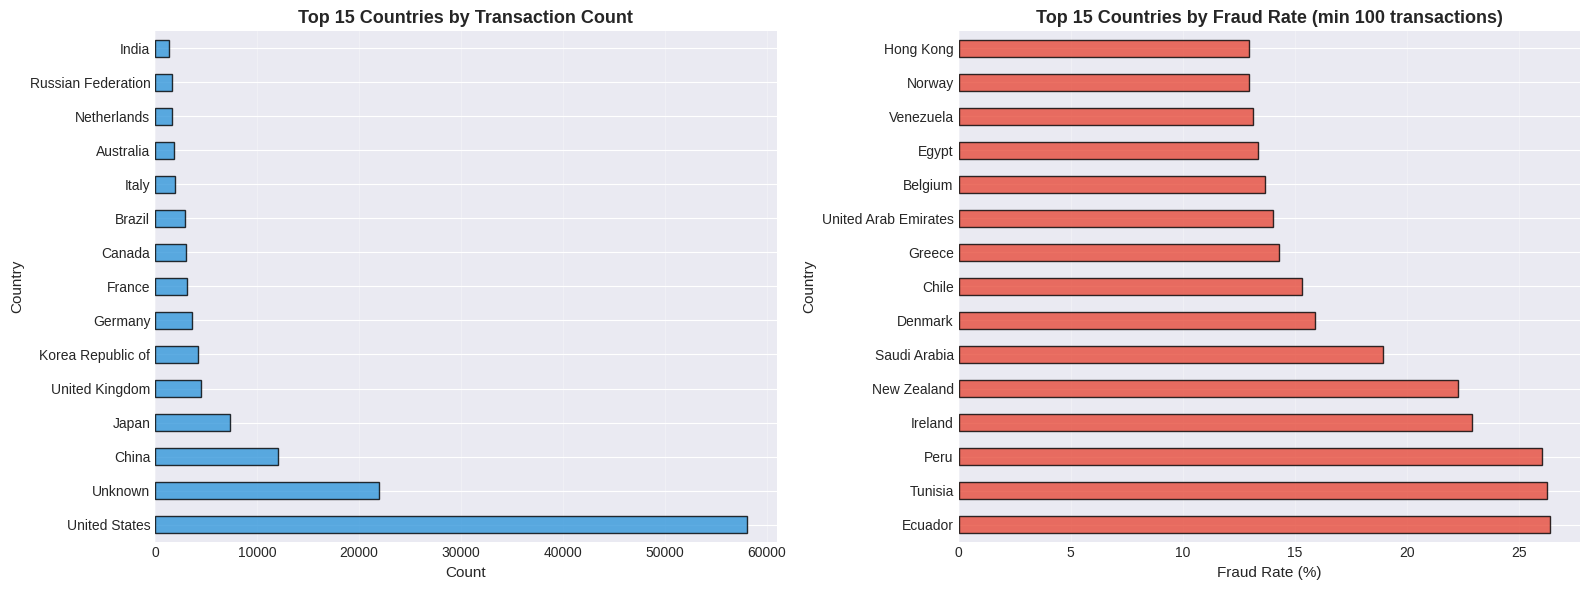

In [17]:
# Visualize country distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 countries
top_countries = country_counts.head(15)
top_countries.plot(kind='barh', ax=axes[0], color='#3498db', alpha=0.8, edgecolor='black')
axes[0].set_title('Top 15 Countries by Transaction Count', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Count', fontsize=11)
axes[0].set_ylabel('Country', fontsize=11)
axes[0].grid(True, alpha=0.3, axis='x')

# Fraud rate by country (if fraud exists)
if 1 in fraud_df['class'].values:
    country_fraud = fraud_df.groupby('country')['class'].agg(['sum', 'count', 'mean'])
    country_fraud.columns = ['Fraud_Count', 'Total', 'Fraud_Rate']
    country_fraud = country_fraud[country_fraud['Total'] >= 100].sort_values('Fraud_Rate', ascending=False)

    top_fraud_countries = country_fraud.head(15)
    (top_fraud_countries['Fraud_Rate'] * 100).plot(kind='barh', ax=axes[1],
                                                     color='#e74c3c', alpha=0.8, edgecolor='black')
    axes[1].set_title('Top 15 Countries by Fraud Rate (min 100 transactions)',
                      fontsize=13, fontweight='bold')
    axes[1].set_xlabel('Fraud Rate (%)', fontsize=11)
    axes[1].set_ylabel('Country', fontsize=11)
    axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 7. User Demographics

In [18]:
# Age statistics
print("="*80)
print("AGE STATISTICS")
print("="*80)
print("\nOverall:")
print(fraud_df['age'].describe())

print("\nLegitimate Transactions:")
legit_age = fraud_df[fraud_df['class']==0]['age']
print(legit_age.describe())

if 1 in fraud_df['class'].values:
    print("\nFraudulent Transactions:")
    fraud_age = fraud_df[fraud_df['class']==1]['age']
    print(fraud_age.describe())

    # Statistical test
    t_stat, p_value = stats.mannwhitneyu(legit_age, fraud_age, alternative='two-sided')
    print(f"\nMann-Whitney U Test:")
    print(f"  P-value: {p_value:.2e}")
    if p_value < 0.05:
        print("  ✅ Significant difference in age (p < 0.05)")
    else:
        print("  ❌ No significant difference (p >= 0.05)")

AGE STATISTICS

Overall:
count   151112.000
mean        33.141
std          8.618
min         18.000
25%         27.000
50%         33.000
75%         39.000
max         76.000
Name: age, dtype: float64

Legitimate Transactions:
count   136961.000
mean        33.122
std          8.623
min         18.000
25%         27.000
50%         33.000
75%         39.000
max         76.000
Name: age, dtype: float64

Fraudulent Transactions:
count   14151.000
mean       33.318
std         8.568
min        18.000
25%        27.000
50%        33.000
75%        39.000
max        68.000
Name: age, dtype: float64

Mann-Whitney U Test:
  P-value: 3.52e-03
  ✅ Significant difference in age (p < 0.05)


In [19]:
# Gender statistics
print("\n" + "="*80)
print("GENDER DISTRIBUTION")
print("="*80)
gender_counts = fraud_df['sex'].value_counts()
print(gender_counts)
print(f"\nGender distribution (%):")
print(100 * gender_counts / len(fraud_df))

if 1 in fraud_df['class'].values:
    print("\nFraud rate by gender:")
    gender_fraud = fraud_df.groupby('sex')['class'].agg(['sum', 'count', 'mean'])
    gender_fraud.columns = ['Fraud_Count', 'Total', 'Fraud_Rate']
    print(gender_fraud)


GENDER DISTRIBUTION
sex
M    88293
F    62819
Name: count, dtype: int64

Gender distribution (%):
sex
M   58.429
F   41.571
Name: count, dtype: float64

Fraud rate by gender:
     Fraud_Count  Total  Fraud_Rate
sex                                
F           5717  62819       0.091
M           8434  88293       0.096


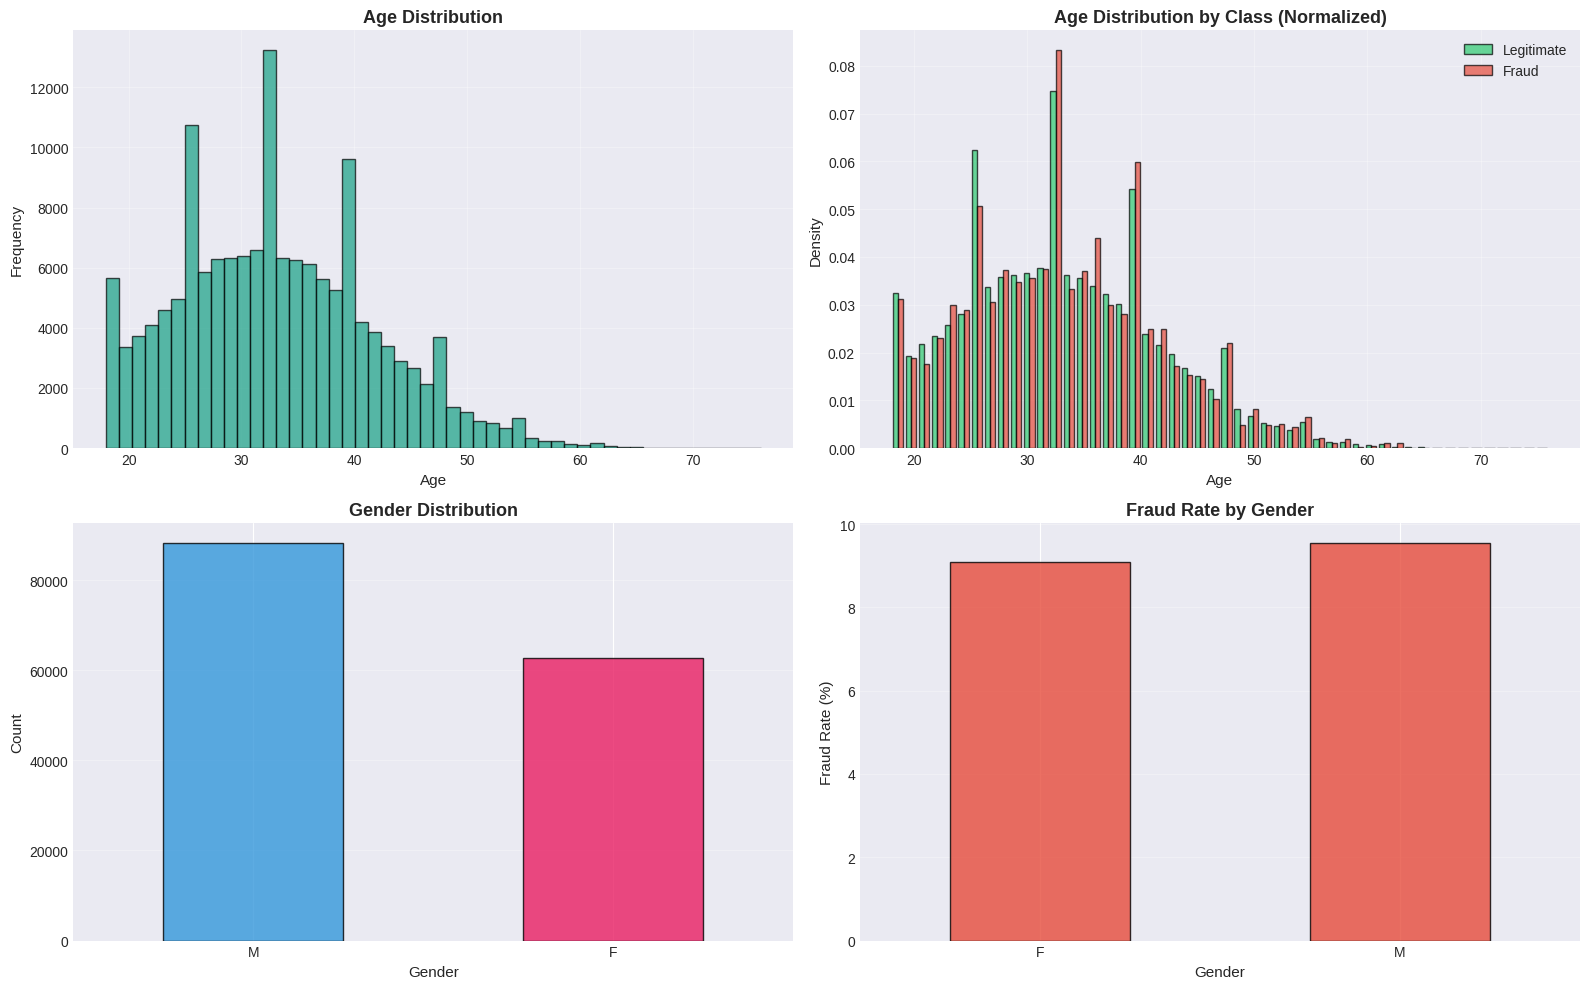

In [20]:
# Visualize demographics
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Age distribution
axes[0, 0].hist(fraud_df['age'], bins=50, color='#16a085', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Age Distribution', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Age by class
if 1 in fraud_df['class'].values:
    axes[0, 1].hist([legit_age, fraud_age], bins=50,
                    color=['#2ecc71', '#e74c3c'], label=['Legitimate', 'Fraud'],
                    alpha=0.7, edgecolor='black', density=True)
    axes[0, 1].set_title('Age Distribution by Class (Normalized)', fontsize=13, fontweight='bold')
    axes[0, 1].set_xlabel('Age', fontsize=11)
    axes[0, 1].set_ylabel('Density', fontsize=11)
    axes[0, 1].legend(fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)

# Gender distribution
gender_counts.plot(kind='bar', ax=axes[1, 0], color=['#3498db', '#e91e63'],
                   alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Gender Distribution', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Gender', fontsize=11)
axes[1, 0].set_ylabel('Count', fontsize=11)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Fraud rate by gender (if applicable)
if 1 in fraud_df['class'].values:
    (gender_fraud['Fraud_Rate'] * 100).plot(kind='bar', ax=axes[1, 1],
                                             color='#e74c3c', alpha=0.8, edgecolor='black')
    axes[1, 1].set_title('Fraud Rate by Gender', fontsize=13, fontweight='bold')
    axes[1, 1].set_xlabel('Gender', fontsize=11)
    axes[1, 1].set_ylabel('Fraud Rate (%)', fontsize=11)
    axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)
    axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 8. Device and Source Analysis

In [21]:
# Source statistics
print("="*80)
print("SOURCE DISTRIBUTION")
print("="*80)
source_counts = fraud_df['source'].value_counts()
print(source_counts)
print(f"\nUnique sources: {fraud_df['source'].nunique()}")

if 1 in fraud_df['class'].values:
    print("\nFraud rate by source:")
    source_fraud = fraud_df.groupby('source')['class'].agg(['sum', 'count', 'mean'])
    source_fraud.columns = ['Fraud_Count', 'Total', 'Fraud_Rate']
    print(source_fraud.sort_values('Fraud_Rate', ascending=False))

SOURCE DISTRIBUTION
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64

Unique sources: 3

Fraud rate by source:
        Fraud_Count  Total  Fraud_Rate
source                                
Direct         3226  30616       0.105
Ads            5513  59881       0.092
SEO            5412  60615       0.089


In [22]:
# Browser statistics
print("\n" + "="*80)
print("BROWSER DISTRIBUTION")
print("="*80)
browser_counts = fraud_df['browser'].value_counts()
print(browser_counts.head(10))
print(f"\nUnique browsers: {fraud_df['browser'].nunique()}")

if 1 in fraud_df['class'].values:
    print("\nTop 10 browsers by fraud rate:")
    browser_fraud = fraud_df.groupby('browser')['class'].agg(['sum', 'count', 'mean'])
    browser_fraud.columns = ['Fraud_Count', 'Total', 'Fraud_Rate']
    browser_fraud = browser_fraud[browser_fraud['Total'] >= 50]  # Min 50 transactions
    print(browser_fraud.sort_values('Fraud_Rate', ascending=False).head(10))


BROWSER DISTRIBUTION
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64

Unique browsers: 5

Top 10 browsers by fraud rate:
         Fraud_Count  Total  Fraud_Rate
browser                                
Chrome          6069  61432       0.099
FireFox         2342  24610       0.095
Safari          2225  24667       0.090
Opera            328   3676       0.089
IE              3187  36727       0.087


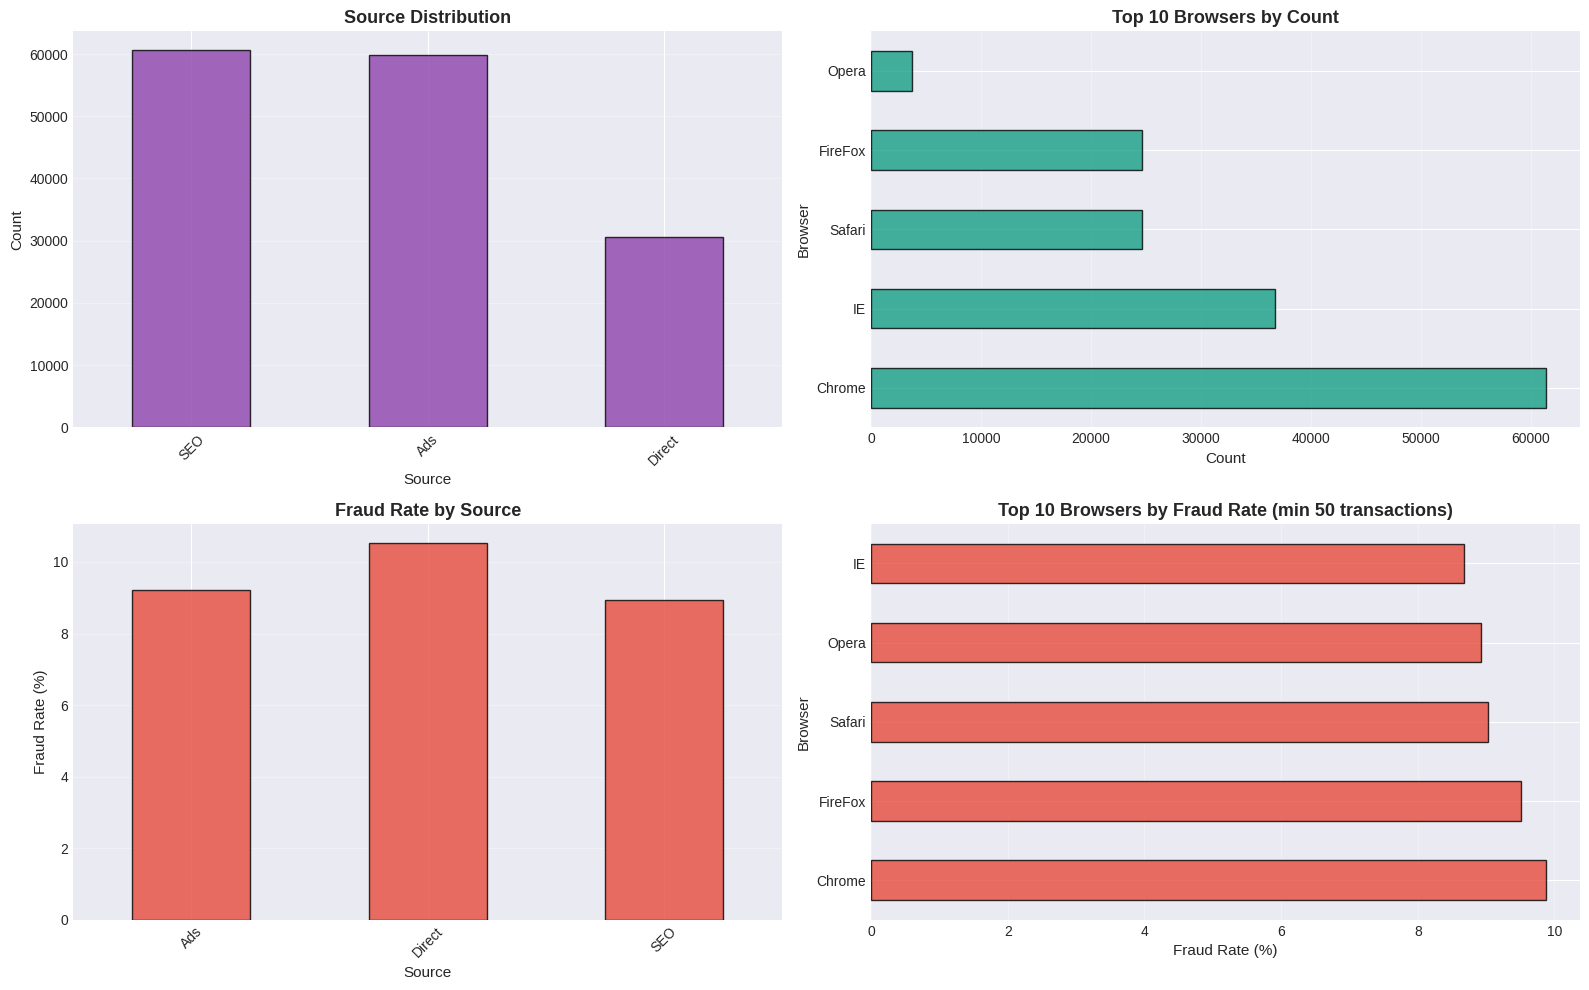

In [23]:
# Visualize source and browser
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Source distribution
source_counts.plot(kind='bar', ax=axes[0, 0], color='#8e44ad', alpha=0.8, edgecolor='black')
axes[0, 0].set_title('Source Distribution', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Source', fontsize=11)
axes[0, 0].set_ylabel('Count', fontsize=11)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Top browsers
browser_counts.head(10).plot(kind='barh', ax=axes[0, 1], color='#16a085', alpha=0.8, edgecolor='black')
axes[0, 1].set_title('Top 10 Browsers by Count', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Count', fontsize=11)
axes[0, 1].set_ylabel('Browser', fontsize=11)
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Fraud rate by source
if 1 in fraud_df['class'].values:
    (source_fraud['Fraud_Rate'] * 100).plot(kind='bar', ax=axes[1, 0],
                                             color='#e74c3c', alpha=0.8, edgecolor='black')
    axes[1, 0].set_title('Fraud Rate by Source', fontsize=13, fontweight='bold')
    axes[1, 0].set_xlabel('Source', fontsize=11)
    axes[1, 0].set_ylabel('Fraud Rate (%)', fontsize=11)
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # Fraud rate by browser (top 10)
    top_browser_fraud = browser_fraud.sort_values('Fraud_Rate', ascending=False).head(10)
    (top_browser_fraud['Fraud_Rate'] * 100).plot(kind='barh', ax=axes[1, 1],
                                                   color='#e74c3c', alpha=0.8, edgecolor='black')
    axes[1, 1].set_title('Top 10 Browsers by Fraud Rate (min 50 transactions)',
                         fontsize=13, fontweight='bold')
    axes[1, 1].set_xlabel('Fraud Rate (%)', fontsize=11)
    axes[1, 1].set_ylabel('Browser', fontsize=11)
    axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 9. User Behavior Patterns

In [24]:
# Transaction count per user
user_transaction_counts = fraud_df['user_id'].value_counts()

print("="*80)
print("USER TRANSACTION PATTERNS")
print("="*80)
print(f"\nTotal unique users: {len(user_transaction_counts):,}")
print(f"Total transactions: {len(fraud_df):,}")
print(f"Average transactions per user: {user_transaction_counts.mean():.2f}")
print(f"Median transactions per user: {user_transaction_counts.median():.0f}")
print(f"Max transactions by single user: {user_transaction_counts.max()}")
print(f"\nUsers with only 1 transaction: {(user_transaction_counts == 1).sum():,} ({100*(user_transaction_counts == 1).sum()/len(user_transaction_counts):.1f}%)")
print(f"Users with >10 transactions: {(user_transaction_counts > 10).sum():,}")

USER TRANSACTION PATTERNS

Total unique users: 151,112
Total transactions: 151,112
Average transactions per user: 1.00
Median transactions per user: 1
Max transactions by single user: 1

Users with only 1 transaction: 151,112 (100.0%)
Users with >10 transactions: 0


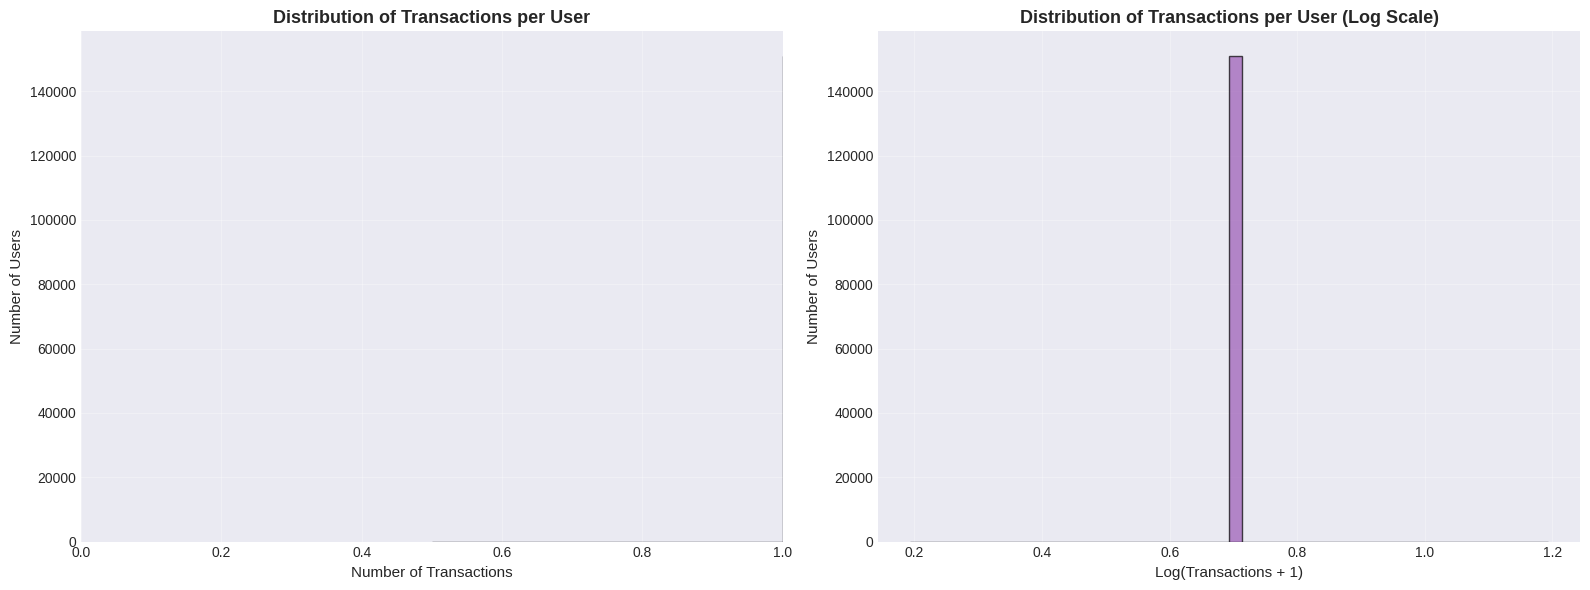

In [25]:
# Visualize user behavior
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Transaction count distribution
axes[0].hist(user_transaction_counts, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Transactions per User', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Number of Transactions', fontsize=11)
axes[0].set_ylabel('Number of Users', fontsize=11)
axes[0].set_xlim(0, min(50, user_transaction_counts.max()))
axes[0].grid(True, alpha=0.3)

# Log scale
axes[1].hist(np.log1p(user_transaction_counts), bins=50, color='#9b59b6', alpha=0.7, edgecolor='black')
axes[1].set_title('Distribution of Transactions per User (Log Scale)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Log(Transactions + 1)', fontsize=11)
axes[1].set_ylabel('Number of Users', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Correlation Analysis

In [26]:
# Select numerical columns for correlation
numerical_cols = ['purchase_value', 'age', 'time_since_signup', 'purchase_hour', 'class']
correlation_matrix = fraud_df[numerical_cols].corr()

print("="*80)
print("CORRELATION WITH FRAUD")
print("="*80)
print(correlation_matrix['class'].sort_values(ascending=False))

CORRELATION WITH FRAUD
class                1.000
age                  0.007
purchase_hour        0.002
purchase_value       0.001
time_since_signup   -0.258
Name: class, dtype: float64


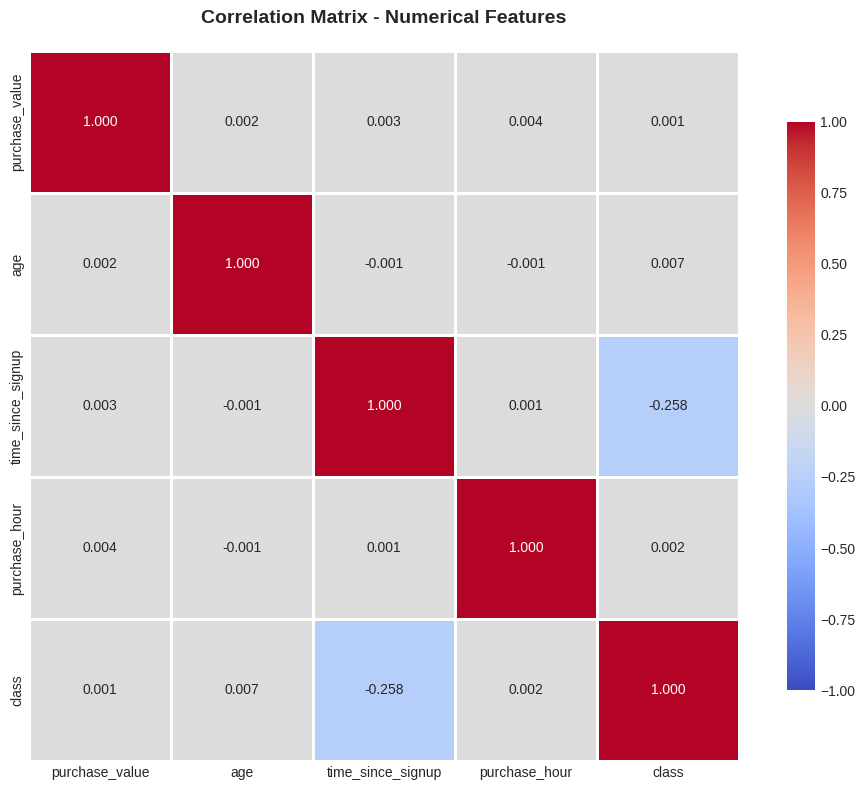

In [27]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, fmt='.3f')
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 11. Categorical Feature Analysis

In [28]:
# Categorical features summary
categorical_cols = ['source', 'browser', 'sex', 'country']

print("="*80)
print("CATEGORICAL FEATURES SUMMARY")
print("="*80)

for col in categorical_cols:
    unique_count = fraud_df[col].nunique()
    print(f"\n{col.upper()}:")
    print(f"  Unique values: {unique_count}")
    print(f"  Top 5 values:")
    print(f"  {fraud_df[col].value_counts().head(5).to_dict()}")

CATEGORICAL FEATURES SUMMARY

SOURCE:
  Unique values: 3
  Top 5 values:
  {'SEO': 60615, 'Ads': 59881, 'Direct': 30616}

BROWSER:
  Unique values: 5
  Top 5 values:
  {'Chrome': 61432, 'IE': 36727, 'Safari': 24667, 'FireFox': 24610, 'Opera': 3676}

SEX:
  Unique values: 2
  Top 5 values:
  {'M': 88293, 'F': 62819}

COUNTRY:
  Unique values: 182
  Top 5 values:
  {'United States': 58049, 'Unknown': 21966, 'China': 12038, 'Japan': 7306, 'United Kingdom': 4490}


## 12. Key Insights and Summary

In [29]:
print("="*80)
print("KEY INSIGHTS FROM EDA")
print("="*80)

print(f"\n1. DATASET OVERVIEW")
print(f"   • Total transactions: {len(fraud_df):,}")
print(f"   • Unique users: {fraud_df['user_id'].nunique():,}")
print(f"   • Average transactions per user: {len(fraud_df)/fraud_df['user_id'].nunique():.2f}")
print(f"   • Features: {fraud_df.shape[1]}")
print(f"   • Time range: {(fraud_df['purchase_time'].max() - fraud_df['purchase_time'].min()).days} days")

print(f"\n2. CLASS DISTRIBUTION")
print(f"   • Legitimate: {class_counts[0]:,} ({class_pct[0]:.2f}%)")
if 1 in class_counts.index:
    print(f"   • Fraudulent: {class_counts[1]:,} ({class_pct[1]:.2f}%)")
    print(f"   • Imbalance ratio: {imbalance_ratio:.2f}:1")
    print(f"   • ⚠️  Requires class balancing techniques")

print(f"\n3. TEMPORAL INSIGHTS")
print(f"   • Mean time since signup: {fraud_df['time_since_signup'].mean():.2f} hours")
print(f"   • Median time since signup: {fraud_df['time_since_signup'].median():.2f} hours")
print(f"   • Peak purchase hour: {fraud_df['purchase_hour'].mode()[0]}")
if 1 in fraud_df['class'].values and p_value < 0.05:
    print(f"   • ✅ Significant temporal difference between fraud/legitimate")

print(f"\n4. PURCHASE VALUE")
print(f"   • Mean: ${fraud_df['purchase_value'].mean():.2f}")
print(f"   • Median: ${fraud_df['purchase_value'].median():.2f}")
if 1 in fraud_df['class'].values:
    print(f"   • Mean (Legitimate): ${legit_values.mean():.2f}")
    print(f"   • Mean (Fraud): ${fraud_values.mean():.2f}")

print(f"\n5. GEOGRAPHIC DISTRIBUTION")
print(f"   • Unique countries: {fraud_df['country'].nunique()}")
print(f"   • Top country: {country_counts.index[0]} ({country_counts.iloc[0]:,} transactions)")
print(f"   • Unknown IPs: {(fraud_df['country']=='Unknown').sum():,}")

print(f"\n6. USER DEMOGRAPHICS")
print(f"   • Mean age: {fraud_df['age'].mean():.1f} years")
print(f"   • Gender split: {dict(100*gender_counts/len(fraud_df))}")

print(f"\n7. SOURCE & BROWSER")
print(f"   • Unique sources: {fraud_df['source'].nunique()}")
print(f"   • Unique browsers: {fraud_df['browser'].nunique()}")
print(f"   • Top source: {source_counts.index[0]} ({source_counts.iloc[0]:,})")
print(f"   • Top browser: {browser_counts.index[0]} ({browser_counts.iloc[0]:,})")

print(f"\n8. ENGINEERED FEATURES CREATED")
print(f"   ✓ time_since_signup (hours)")
print(f"   ✓ purchase_hour")
print(f"   ✓ purchase_day")
print(f"   ✓ purchase_month")
print(f"   ✓ signup_hour")
print(f"   ✓ country (from IP mapping)")

print(f"\n9. RECOMMENDATIONS FOR MODELING")
print(f"   ✓ Use stratified train-test split")
print(f"   ✓ Apply SMOTE or class weights for imbalance")
print(f"   ✓ One-hot encode: source, browser, sex, country")
print(f"   ✓ Scale numerical features: purchase_value, age, time_since_signup")
print(f"   ✓ Consider user-level aggregations (transaction frequency)")
print(f"   ✓ Focus on Precision-Recall metrics")
print(f"   ✓ Use cross-validation with stratification")

print("\n" + "="*80)

KEY INSIGHTS FROM EDA

1. DATASET OVERVIEW
   • Total transactions: 151,112
   • Unique users: 151,112
   • Average transactions per user: 1.00
   • Features: 17
   • Time range: 349 days

2. CLASS DISTRIBUTION
   • Legitimate: 136,961 (90.64%)
   • Fraudulent: 14,151 (9.36%)
   • Imbalance ratio: 9.68:1
   • ⚠️  Requires class balancing techniques

3. TEMPORAL INSIGHTS
   • Mean time since signup: 1370.01 hours
   • Median time since signup: 1368.43 hours
   • Peak purchase hour: 17
   • ✅ Significant temporal difference between fraud/legitimate

4. PURCHASE VALUE
   • Mean: $36.94
   • Median: $35.00
   • Mean (Legitimate): $36.93
   • Mean (Fraud): $36.99

5. GEOGRAPHIC DISTRIBUTION
   • Unique countries: 182
   • Top country: United States (58,049 transactions)
   • Unknown IPs: 21,966

6. USER DEMOGRAPHICS
   • Mean age: 33.1 years
   • Gender split: {'M': np.float64(58.42884747736778), 'F': np.float64(41.57115252263222)}

7. SOURCE & BROWSER
   • Unique sources: 3
   • Unique bro

## 13. Export Summary Statistics

In [30]:
# Create summary report
summary_stats = {
    'Dataset': 'Fraud_Data.csv',
    'Total_Transactions': len(fraud_df),
    'Unique_Users': fraud_df['user_id'].nunique(),
    'Legitimate_Count': class_counts[0],
    'Fraud_Count': class_counts.get(1, 0),
    'Fraud_Rate_%': class_pct.get(1, 0),
    'Imbalance_Ratio': imbalance_ratio if 1 in class_counts.index else 0,
    'Mean_Purchase_Value': fraud_df['purchase_value'].mean(),
    'Mean_Age': fraud_df['age'].mean(),
    'Mean_Time_Since_Signup_Hours': fraud_df['time_since_signup'].mean(),
    'Unique_Countries': fraud_df['country'].nunique(),
    'Unique_Sources': fraud_df['source'].nunique(),
    'Unique_Browsers': fraud_df['browser'].nunique(),
    'Top_Country': country_counts.index[0],
    'Top_Source': source_counts.index[0],
}

summary_df = pd.DataFrame([summary_stats])
print("\n📊 SUMMARY STATISTICS")
print(summary_df.T)

# Optionally save to CSV
# summary_df.to_csv('../data/processed/fraud_data_eda_summary.csv', index=False)
# print("\n✅ Summary saved to: ../data/processed/fraud_data_eda_summary.csv")


📊 SUMMARY STATISTICS
                                           0
Dataset                       Fraud_Data.csv
Total_Transactions                    151112
Unique_Users                          151112
Legitimate_Count                      136961
Fraud_Count                            14151
Fraud_Rate_%                           9.365
Imbalance_Ratio                        9.679
Mean_Purchase_Value                   36.935
Mean_Age                              33.141
Mean_Time_Since_Signup_Hours        1370.008
Unique_Countries                         182
Unique_Sources                             3
Unique_Browsers                            5
Top_Country                    United States
Top_Source                               SEO


---
## End of EDA

**Next Steps:**
1. Data preprocessing pipeline (as per data_preprocessing.py)
2. Feature engineering and transformation
3. Train-test split with stratification
4. Apply SMOTE for class balancing
5. Model training and evaluation
6. Hyperparameter tuning
7. Model interpretation with SHAP